2.3999999991527305


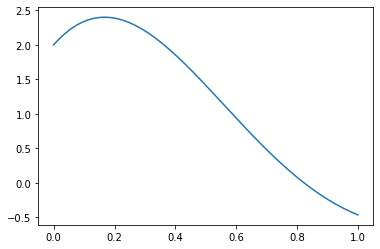

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def itera_qn (f,x,delta):
    fx = f(x)
    fxd = f(x+delta)
    novo_x = x - delta/(fxd - fx) * fx
    return novo_x

def quasi_newton (f,x0,delta,max_it,tol):
    iteradas = []
    erros = []
    for i in range(max_it):
        novo_x = itera_qn(f,x0,delta)
        erro = abs(x0-novo_x)
        iteradas.append(novo_x)
        erros.append(erro)
        if erro < tol:
            break
        x0 = novo_x
    return iteradas,erros


def bissec(F,a,b,tol):
    Fa = F(a)
    Fb = F(b)
    while abs(a-b)>tol:
        mid = (a+b)/2
        Fmid = F(mid)
        if Fmid*Fa<0:
            Fb = Fmid
            b = mid
        else:
            Fa = Fmid
            a = mid
    return (a+b)/2


def argMax_F(F,x0,delta,max_it,tol):
    """
    Calcula o valor de x correspondente ao máximo de F
    Em vez da derivada F' usa como aproximação a diferença dividida de ordem 1
    """
    def deriv_F(x):
        deriv = (F(x+delta)-F(x))/delta
        return deriv
    max_x = quasi_newton(deriv_F,x0,delta,max_it,tol)[0][-1]
    return max_x

def cria_W (k):
    def W(r):
        return 2*np.exp(-k*r)*(k*np.sin(3*r)+np.cos(3*r))
    return W

def find_k(kmin,kmax,val,delta,max_it,tol,x0):
    def target(k):
        W = cria_W(k)
        max_x = argMax_F(W,x0,delta,max_it,tol)
        #print(max_x)
        return W(max_x)-val
    return bissec(target,kmin,kmax,tol)

k=find_k(0,5,2.4,0.001,50,1e-8,0)
W=cria_W(k)
r0=argMax_F(W,0,0.001,50,1e-8)

x=np.linspace(0,1,500)
plt.plot(x,W(x))
print(W(r0))


In [2]:
k

1.254648664034903

In [4]:
W

<function __main__.cria_W.<locals>.W(r)>

In [5]:
r0

0.16675166034013467